# ICE 7 Diagnostic Metrics

**Author:** Wendy Weng


**Objectives:**
At the end of this ICE, you will be able to:

identify the correct model diagnostic metric(s) for performance

implement at least one model diagnostic metric for a model you have built for ACA2 or ACA3

In [1]:
# Import the standard stuff
import pandas as pd
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [2]:
# Import dataset
df = pd.read_csv("CollegeScorecard.csv")
df.head()

/Users/wendy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,9,1427,1542,1561,1575,1725,1726,1727,1728) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.443586698337,0.45251396648,0.484818805093,0.406,0.423580786026,0.442452830189,NaN,0.30871831265508,NaN,0.35168556430446
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.732297852901,0.795454545455,0.760521885522,0.755344418052,0.751552795031,0.765074770863,NaN,0.50854980789381,NaN,0.4730923834537
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.600877192982,0.775,0.610465116279,0.686567164179,0.632653061224,0.65,NaN,PrivacySuppressed,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.738341968912,0.85140562249,0.768378650554,0.798440979955,0.778156996587,0.791666666667,NaN,0.47821134615384,NaN,0.49412939796716
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.320016820858,0.380829015544,0.364423717522,0.286530612245,0.315737051793,0.334633385335,NaN,0.25748195545488,NaN,0.29365162671232


In [3]:
#Select the columns that we use for clustering
#Variables: School ID, Completion rate,Average cost of attendance (academic year institutions)
#The proportion of undergraduates who received a Pell grant
#Instructional expenditures per full-time equivalent student
#Proportion of faculty that is full-time
#Average faculty salary
#Share of students who received a federal loan/Pell Grant while in school
#Percentage of students who are financially independent and have family incomes between $0-30,000
#PREDDEG and LOCALE would be categorical variables.
Selected = df[['UNITID',
               'PREDDEG',
               'C150_4',
               'PFTFAC',
               'TUITFTE',
               'INEXPFTE',
               'AVGFACSAL',
               'PCTPELL',
               'NPT4_PUB',
               'NPT4_PRIV',
               'LOCALE',
               'LO_INC_RPY_3YR_RT_SUPP',
               'DEP_INC_PCT_LO',
               'IND_INC_PCT_LO',
               'GRAD_DEBT_MDN10YR',
               'NOTFIRSTGEN_DEBT_MDN',
               'FIRSTGEN_RPY_3YR_RT_SUPP',
               'NOTFIRSTGEN_RPY_3YR_RT_SUPP',
               'PELL_DEBT_MDN',
               'FIRSTGEN_DEBT_MDN',
               
]]
Selected

,UNITID,PREDDEG,C150_4,PFTFAC,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,NPT4_PUB,NPT4_PRIV,LOCALE,LO_INC_RPY_3YR_RT_SUPP,DEP_INC_PCT_LO,IND_INC_PCT_LO,GRAD_DEBT_MDN10YR,NOTFIRSTGEN_DEBT_MDN,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,PELL_DEBT_MDN,FIRSTGEN_DEBT_MDN
0,100654,3,0.2914,0.8856,9063.0,7459.0,7079.0,0.7115,13415.0,NaN,12.0,0.448163265306,0.621047664,0.947019868,373.156553575,20250,0.423580786026,0.442452830189,20441,18186
1,100663,3,0.5377,0.9106,9033.0,17208.0,10170.0,0.3505,14805.0,NaN,12.0,0.724256292906,0.362861492,0.701354241,256.64608985,16000,0.751552795031,0.765074770863,18750,15541
2,100690,3,0.6667,0.6721,12057.0,5123.0,3849.0,0.6839,NaN,7455.0,12.0,0.597701149425,0.594594595,0.78342246,299.69983975,12698,0.632653061224,0.65,10500,11692
3,100706,3,0.4835,0.6555,8322.0,9352.0,9341.0,0.3281,17520.0,NaN,12.0,0.721404303511,0.355848435,0.7125,274.6425129,16500,0.778156996587,0.791666666667,18750,16446
4,100724,3,0.2517,0.6641,7813.0,7393.0,6557.0,0.8265,11936.0,NaN,12.0,0.310875331565,0.637982196,0.967567568,371.3857766,15000,0.315737051793,0.334633385335,16746,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875
7800,48285704,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875
7801,48285705,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875
7802,48285706,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875


In [4]:
# Combine column NPT4_PUB and NPT4_PRIV for further cleaning purpose
Selected['NPT4']= Selected['NPT4_PUB'].fillna(0) + Selected['NPT4_PRIV'].fillna(0)
Selected = Selected.drop(columns = ['NPT4_PUB','NPT4_PRIV'])

Selected

/var/folders/8h/7qdwvvnd24bf11wqycvqjxlw0000gn/T/ipykernel_32928/2301148032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selected['NPT4']= Selected['NPT4_PUB'].fillna(0) + Selected['NPT4_PRIV'].fillna(0)


,UNITID,PREDDEG,C150_4,PFTFAC,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,LOCALE,LO_INC_RPY_3YR_RT_SUPP,DEP_INC_PCT_LO,IND_INC_PCT_LO,GRAD_DEBT_MDN10YR,NOTFIRSTGEN_DEBT_MDN,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,PELL_DEBT_MDN,FIRSTGEN_DEBT_MDN,NPT4
0,100654,3,0.2914,0.8856,9063.0,7459.0,7079.0,0.7115,12.0,0.448163265306,0.621047664,0.947019868,373.156553575,20250,0.423580786026,0.442452830189,20441,18186,13415.0
1,100663,3,0.5377,0.9106,9033.0,17208.0,10170.0,0.3505,12.0,0.724256292906,0.362861492,0.701354241,256.64608985,16000,0.751552795031,0.765074770863,18750,15541,14805.0
2,100690,3,0.6667,0.6721,12057.0,5123.0,3849.0,0.6839,12.0,0.597701149425,0.594594595,0.78342246,299.69983975,12698,0.632653061224,0.65,10500,11692,7455.0
3,100706,3,0.4835,0.6555,8322.0,9352.0,9341.0,0.3281,12.0,0.721404303511,0.355848435,0.7125,274.6425129,16500,0.778156996587,0.791666666667,18750,16446,17520.0
4,100724,3,0.2517,0.6641,7813.0,7393.0,6557.0,0.8265,12.0,0.310875331565,0.637982196,0.967567568,371.3857766,15000,0.315737051793,0.334633385335,16746,15000,11936.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875,0.0
7800,48285704,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875,0.0
7801,48285705,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875,0.0
7802,48285706,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420927467301,0.566411849,0.782289904,116.571525,5500,0.490384615385,0.495152870992,6533,6875,0.0


In [5]:
#Clean data (drop the PrivacySuppressed and NA)
Selected = Selected.replace('PrivacySuppressed',np.nan)
Selected1 = Selected.dropna()
Selected1

,UNITID,PREDDEG,C150_4,PFTFAC,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,LOCALE,LO_INC_RPY_3YR_RT_SUPP,DEP_INC_PCT_LO,IND_INC_PCT_LO,GRAD_DEBT_MDN10YR,NOTFIRSTGEN_DEBT_MDN,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,PELL_DEBT_MDN,FIRSTGEN_DEBT_MDN,NPT4
0,100654,3,0.2914,0.8856,9063.0,7459.0,7079.0,0.7115,12.0,0.448163265306,0.621047664,0.947019868,373.156553575,20250,0.423580786026,0.442452830189,20441,18186,13415.0
1,100663,3,0.5377,0.9106,9033.0,17208.0,10170.0,0.3505,12.0,0.724256292906,0.362861492,0.701354241,256.64608985,16000,0.751552795031,0.765074770863,18750,15541,14805.0
2,100690,3,0.6667,0.6721,12057.0,5123.0,3849.0,0.6839,12.0,0.597701149425,0.594594595,0.78342246,299.69983975,12698,0.632653061224,0.65,10500,11692,7455.0
3,100706,3,0.4835,0.6555,8322.0,9352.0,9341.0,0.3281,12.0,0.721404303511,0.355848435,0.7125,274.6425129,16500,0.778156996587,0.791666666667,18750,16446,17520.0
4,100724,3,0.2517,0.6641,7813.0,7393.0,6557.0,0.8265,12.0,0.310875331565,0.637982196,0.967567568,371.3857766,15000,0.315737051793,0.334633385335,16746,15000,11936.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653,3,0.2247,0.1136,17432.0,3886.0,6588.0,0.4802,12.0,0.486990016508,0.525548222,0.677546427,478.1430894,20888,0.537987286513,0.572239422085,21875.5,20911.5,19151.0
7368,482662,3,0.2903,0.2195,15865.0,4434.0,5715.0,0.5855,21.0,0.486990016508,0.525548222,0.677546427,478.1430894,20888,0.537987286513,0.572239422085,21875.5,20911.5,17667.0
7369,482671,3,0.0000,0.0294,15898.0,4019.0,5202.0,0.6125,11.0,0.486990016508,0.525548222,0.677546427,478.1430894,20888,0.537987286513,0.572239422085,21875.5,20911.5,20867.0
7370,482680,3,0.2597,0.8824,4149.0,4614.0,5492.0,0.3793,31.0,0.83064516129,0.31368129,0.739637827,182.88406965,7500,0.859813084112,0.854381443299,8763,7500,14534.0


In [6]:
#Drop the UNITID for PCA 
SelectedClean = Selected1.drop(columns =['UNITID'])


In [7]:
#Scale the data use StandardScalar

from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit(SelectedClean)
scaled_data = scaler.transform(SelectedClean)
scaled_data

array([[1.        , 0.31219199, 0.88316993, ..., 0.59825726, 0.52325424,
        0.31137572],
       [1.        , 0.576066  , 0.90870098, ..., 0.53884263, 0.43359322,
        0.34363902],
       [1.        , 0.71427041, 0.6651348 , ..., 0.24897228, 0.30311864,
        0.17303809],
       ...,
       [1.        , 0.        , 0.00878268, ..., 0.64865957, 0.61564407,
        0.48434417],
       [1.        , 0.27823013, 0.87990196, ..., 0.18794139, 0.16101695,
        0.33734884],
       [0.5       , 0.1603814 , 0.51082516, ..., 0.14312568, 0.1440678 ,
        0.18141726]])

In [8]:
#The dimension is high, I choose to use PCA to reduce it. 
pca = PCA(n_components = 18)
pca.fit(scaled_data)

print("The principal components are:")
print(pca.components_)
print("The explained variances are:")
print(pca.explained_variance_)

The principal components are:
[[-2.41860901e-01 -2.35420509e-01 -3.52914472e-01  8.35240306e-03
  -9.91836727e-02 -1.58802280e-01  2.85992924e-01 -9.44661149e-02
  -3.75404589e-01  3.31247379e-01  1.18431402e-01  1.22878575e-02
  -1.41252862e-01 -3.80420583e-01 -3.86224459e-01 -1.86362371e-01
  -1.48889310e-01 -1.09468476e-02]
 [-4.97843220e-02 -9.47434360e-02  4.17674041e-01 -3.38051973e-01
  -3.49894756e-02 -3.83282462e-02 -7.53832263e-03  4.41657047e-01
   2.71235052e-02  5.41303227e-02  6.43332841e-02 -2.84556186e-01
  -3.33921869e-01  3.07814005e-02  3.00207965e-02 -3.40994630e-01
  -3.21141742e-01 -2.83662980e-01]
 [ 5.75179174e-02 -9.97752571e-02 -3.20226056e-01  4.61553139e-02
  -6.30512484e-02 -1.23771490e-01  2.67090201e-02  8.49231582e-01
  -6.20525632e-02 -9.49556989e-02 -1.25877004e-01  2.11292772e-01
   1.42001985e-01 -2.62940894e-02 -8.57112029e-03  1.43687188e-01
   1.44610948e-01  7.08134984e-02]
 [ 3.28216706e-01 -1.27250877e-01  6.68791087e-01 -1.19826981e-02
  -3.05

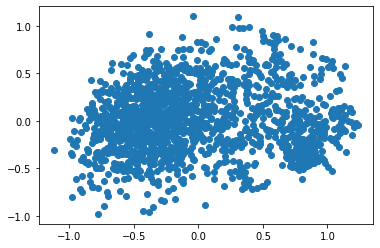

In [9]:
#0.3122 and 0.1216 explaining substantially more variances than other components. So I plot it.

df = pca.transform(scaled_data)
plt.scatter(df[:,0], df[:,1])

In [10]:
# K-Means Clustering
#testing for clusters with the highest silhouetteScore
from sklearn.metrics import silhouette_score

for x in range(2, 10): 
    kmeans = KMeans(n_clusters = x)
    kmeans.fit(df)
    cluster_kmeans = kmeans.predict(df)
    silhouetteScore = silhouette_score(df, cluster_kmeans, metric='euclidean')
    print(('Clusters:',x,'Silhouetter Score:', silhouetteScore))

('Clusters:', 2, 'Silhouetter Score:', 0.32043272486565755)
('Clusters:', 3, 'Silhouetter Score:', 0.2168061584201013)
('Clusters:', 4, 'Silhouetter Score:', 0.21225105594200663)
('Clusters:', 5, 'Silhouetter Score:', 0.1942880452131024)
('Clusters:', 6, 'Silhouetter Score:', 0.18140022756041838)
('Clusters:', 7, 'Silhouetter Score:', 0.18219910899823602)
('Clusters:', 8, 'Silhouetter Score:', 0.17762123764367257)
('Clusters:', 9, 'Silhouetter Score:', 0.18253398774346763)


In [11]:
for x in range(2, 10): 
    kmeans = KMeans(n_clusters = x)
    kmeans.fit(SelectedClean)
    cluster_kmeans = kmeans.predict(SelectedClean)
    silhouetteScore = silhouette_score(SelectedClean, cluster_kmeans, metric='euclidean')
    print(('Clusters:',x,'Silhouetter Score:', silhouetteScore))

('Clusters:', 2, 'Silhouetter Score:', 0.3172996129035735)
('Clusters:', 3, 'Silhouetter Score:', 0.2950010055236862)
('Clusters:', 4, 'Silhouetter Score:', 0.2884513048730221)
('Clusters:', 5, 'Silhouetter Score:', 0.2756210864178245)
('Clusters:', 6, 'Silhouetter Score:', 0.27719741002247167)
('Clusters:', 7, 'Silhouetter Score:', 0.252962304808952)
('Clusters:', 8, 'Silhouetter Score:', 0.26170228586174116)
('Clusters:', 9, 'Silhouetter Score:', 0.25774155552711453)


In [12]:
#clusters = 2 With PCA has the highest Silhouetter Score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
cluster_kmeans = kmeans.predict(df)

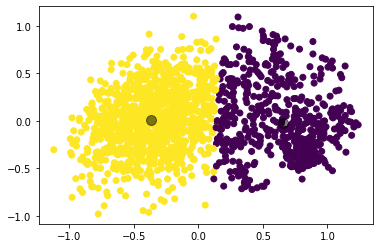

In [13]:
# Use cluster_means as the indicator for clusters
plt.scatter(df[:, 0], df[:, 1], c=cluster_kmeans, cmap='viridis') 

centers = kmeans.cluster_centers_

# plotting the centers onto scatter plot
# c is for color, s is for dot size, and alpha is for transparency
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

In [14]:
silhouetteScore = silhouette_score(df, cluster_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.32043272486565755


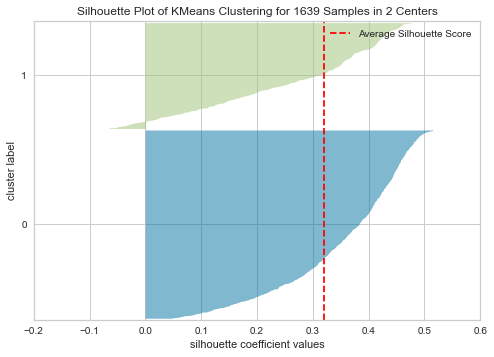

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1639 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
#Visualize Silhouette coefficient for each

from yellowbrick.cluster import SilhouetteVisualizer

smodel = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')
visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure.

**ACA 2 Diagnostic metrics**

In [16]:
df_va = pd.read_csv("aca2_dataset_validation.csv")
df_tr = pd.read_csv("aca2_dataset_training.csv")
df_tr

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


In [17]:
#clean data
#drop columns irrelavant to the classification analysis
df_tr = df_tr.drop(['UNIQUEID',
                    'SCHOOL',
                    'GRADE',
                    'Gender',
                    'Class',
                    'STUDENTID',
                    'CODER',
                    'OBSNUM',
                    'totalobs-forsession',
                    'TRANSITIONS',
                    'FORMATchanges',
#                     'NumACTIVITIES',
#                     'NumFORMATS',
#                     'Obsv/act',
                    'Transitions/Durations',
                    'Total Time'],
                   axis = 1)
df_tr

,Activity,ONTASK,NumACTIVITIES,NumFORMATS,Obsv/act
0,Wholecarpet,Y,2,2,1390.500000
1,Individual,Y,3,3,890.333333
2,Smallgroup,Y,4,2,770.500000
3,Wholedesks,Y,6,1,592.333333
4,Wholedesks,Y,3,2,870.000000
...,...,...,...,...,...
22179,Wholecarpet,Y,3,3,969.000000
22180,Smallgroup,N,4,2,770.500000
22181,Smallgroup,N,2,1,1060.000000
22182,Wholedesks,Y,2,2,1204.500000


In [18]:
import seaborn as sns

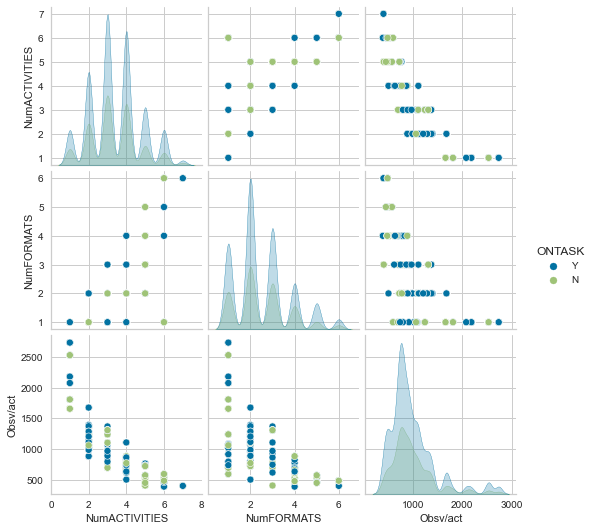

In [19]:
#generate some descriptives to help us understand data
#

sns.pairplot(df_tr, hue = "ONTASK")

<AxesSubplot:>

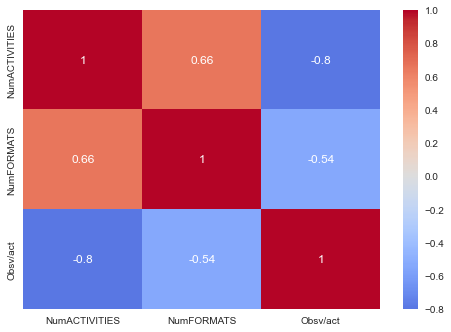

In [20]:
m=df_tr.corr().round(2)
sns.heatmap(data=m, annot=True, center=0.0, cmap='coolwarm')

In [21]:
dummy2 = pd.get_dummies(df_tr['Activity'], prefix = 'Activity') # Here prefix = 'Activity' will create new column names
dummy2_v = pd.get_dummies(df_va['Activity'], prefix = 'Activity')

df_train = pd.concat([df_tr,dummy2],axis = 1)
df_va = pd.concat([df_va,dummy2_v],axis = 1)

In [22]:
#prepare the dataset
#create dummy variable for ONTASK

from sklearn.linear_model import LogisticRegression
dummy1 = pd.get_dummies(df_tr['ONTASK'], prefix = 'ONTASK') # Here prefix = 'certified' will create new column names
dummy1
dummy1_v =pd.get_dummies(df_va['ONTASK'], prefix = 'ONTASK')

In [23]:
#merge the columns
df_train = pd.concat([df_train,dummy1],axis = 1)
df_va = pd.concat([df_va,dummy1_v],axis = 1)
df_train

,Activity,ONTASK,NumACTIVITIES,NumFORMATS,Obsv/act,Activity_Dancing,Activity_Individual,Activity_Smallgroup,Activity_Testing,Activity_Wholecarpet,Activity_Wholedesks,ONTASK_N,ONTASK_Y
0,Wholecarpet,Y,2,2,1390.500000,0,0,0,0,1,0,0,1
1,Individual,Y,3,3,890.333333,0,1,0,0,0,0,0,1
2,Smallgroup,Y,4,2,770.500000,0,0,1,0,0,0,0,1
3,Wholedesks,Y,6,1,592.333333,0,0,0,0,0,1,0,1
4,Wholedesks,Y,3,2,870.000000,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,Wholecarpet,Y,3,3,969.000000,0,0,0,0,1,0,0,1
22180,Smallgroup,N,4,2,770.500000,0,0,1,0,0,0,1,0
22181,Smallgroup,N,2,1,1060.000000,0,0,1,0,0,0,1,0
22182,Wholedesks,Y,2,2,1204.500000,0,0,0,0,0,1,0,1


In [24]:
#further clean the data, drop the extra columns

df_train = df_train.drop(['ONTASK', 'Activity','ONTASK_N'], axis=1)
df_train
Xs = df_train[["NumACTIVITIES","NumFORMATS","Obsv/act"]].to_numpy()
Ontask = df_train.loc[:,"ONTASK_Y"].values.reshape(-1,1)
trainModel1 = LogisticRegression()
trainModel1.fit(Xs,Ontask)

/Users/wendy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [25]:
#Model Evaluation
from sklearn.metrics import confusion_matrix
Xs_logit_test = df_va[["NumACTIVITIES","NumFORMATS","Obsv/act"]].to_numpy()
Actual_Y = df_va.loc[:,"ONTASK_Y"].values.reshape(-1,1)
ontask_pred_logit1 = trainModel1.predict(Xs_logit_test)
print(confusion_matrix(Actual_Y, ontask_pred_logit1))


[[   0 1849]
 [   0 3698]]


In [26]:
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(Actual_Y, ontask_pred_logit1)
print("The accuracy for logistic regression in sklearn is", ac_logit1*100, "%")

The accuracy for logistic regression in sklearn is 66.66666666666666 %
